REMARQUES / COMMENTAIRES / CHOSES A MODIFIER :
===============

1. Dgo : 
    - ajouter corpus na
    - renommer corpus po
    - refaire corpus avec vrai micro
    - demander a po de refaire "plus bas"
2. Benji : 
    - pour le rapport expliquer ce que contiennent nos différents corpus
    
3. a qui veut :
    - faire une fonction qui compte le nombre de fichier wav

# TP1 de MCS

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from random import randrange
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import random
import librosa
import os

## Partie I

In [31]:
def DTW(w0, w1, w2, seq1, seq2, d):
    I, J = seq2.shape[0], seq1.shape[0]
    g = np.empty((I+1,J+1))
    g.fill(None)

    g[0][0] = 0


    for j in range(1,J+1):
        g[0][j] = np.Infinity

    for i in range(1,I+1):
        g[i][0] = np.Infinity
        for j in range(1,J+1):
            g[i][j] = min(g[i-1][j]+d(seq2[i-1],seq1[j-1])*w0, g[i-1][j-1]+d(seq2[i-1],seq1[j-1])*w1, g[i][j-1]+d(seq2[i-1],seq1[j-1])*w2)


#     print(g)
    score = g[I][J]/(I+J)
#     print(f'score: {score}')

    return score 

Définition des fonctions de distance

In [32]:
D = {('X', 'X'): 0, ('X', 'C'): 1, ('X', 'U'): 1, ('X', 'U_X'): 1, ('X', 'V'): 2,
     ('C', 'X'): 1, ('C', 'C'): 0, ('C', 'U'): 1, ('C', 'U_X'): 1, ('C', 'V'): 2, 
     ('U', 'X'): 1, ('U', 'C'): 1, ('U', 'U'): 0, ('U', 'U_X'): 1, ('U', 'V'): 1, 
     ('U_X', 'X'): 1, ('U_X', 'C'): 1, ('U_X', 'U'): 1, ('U_X', 'U_X'): 0, ('U_X', 'V'): 2,
     ('V', 'X'): 2, ('V', 'C'): 2, ('V', 'U'): 1, ('V', 'U_X'): 2, ('V', 'V'): 0}


vect = lambda i, j: np.linalg.norm(i-j)
absolue = lambda i, j: abs(i-j)
euclidienne = lambda i, j: sqrt(i**2 + j**2)
adn = lambda i, j: i!=j
son = lambda i, j: D[(i,j)]

Test avec l'exemple du cours



In [33]:
seq1 = np.array([1,0,2,3])
seq2 = np.array([-1,1,0])

DTW(1, 1, 1, seq1, seq2, vect)

1.0

Test avec l'exemple de l'exercice **2.1**

In [34]:
seq1 = np.array([-2,10,-10,15,-13,20,-5,14,2])
seq2 = np.array([3,-13,14,-7,9,-2])

DTW(1, 1, 1, seq1, seq2, vect)

3.6

Test avec l'exemple de l'exercice **2.2**

In [35]:
seq1 = np.array(['A','T','G','G','T','A','C','G','T','C'])
seq2 = np.array(['A','A','G','T','A','G','G','C'])

DTW(1, 1, 1, seq2, seq1, adn)

0.16666666666666666

Test avec l'exemple de l'exercice **2.3**

In [36]:
cinq, vingt, cent = np.array("X V V C X".split()), np.array("U_X V V".split()), np.array("X V V".split())

*Question 1.*

In [37]:
seq1 = np.array("X X V U X C X".split())

score_seq1_cinq = DTW(1, 2, 1, seq1, cinq, son)
score_seq1_vingt = DTW(1, 2, 1, seq1, vingt, son)
score_seq1_cent = DTW(1, 2, 1, seq1, cent, son)

print(score_seq1_cinq, score_seq1_vingt, score_seq1_cent)
print("Le mot 'cinq' est donc reconnu")

0.25 1.0 0.7
Le mot 'cinq' est donc reconnu


*Question 2.*

In [38]:
seq1 = np.array("U_X U_X V X X V U_X X X V".split())

score_seq1_cinq = DTW(1, 2, 1, seq1, cinq, son)
score_seq1_vingt = DTW(1, 2, 1, seq1, vingt, son)
score_seq1_cent = DTW(1, 2, 1, seq1, cent, son)

print(score_seq1_cinq, score_seq1_vingt, score_seq1_cent)
print("En théorie le mot 'cinq' est reconnu mais ils ont tous quasiment le même score")

0.6 0.6153846153846154 0.6153846153846154
En théorie le mot 'cinq' est reconnu mais ils ont tous quasiment le même score


## Partie II

### Test de la MFCC

In [39]:
m1, sr_m1 = librosa.load("corpus_test/M01_arretetoi.wav")
f1, sr_f1 = librosa.load("corpus_dgo/non_bruite/M20_arretetoi.wav")

mfcc_m1 = librosa.feature.mfcc(y=m1, sr=sr_m1, hop_length=1024, htk=True,
n_mfcc=12)
mfcc_f1 = librosa.feature.mfcc(y=f1, sr=sr_f1, hop_length=1024, htk=True,
n_mfcc=12)

In [40]:
print(mfcc_m1.transpose().shape)
print(mfcc_m1.transpose())

(23, 12)
[[-5.69067566e+02  3.96389389e+01  1.16038837e+01 -2.67735392e-01
   9.88270998e-01  2.37937546e+00  1.00878030e-01  6.42508924e-01
   2.86828995e-01  8.91459227e-01  2.99287844e+00  1.82023335e+00]
 [-5.58488953e+02  4.44846840e+01  1.02761135e+01  3.52746034e+00
   4.30340958e+00  3.58956957e+00 -1.47373736e+00 -5.46282673e+00
  -5.81379366e+00 -1.21794975e+00 -2.13599277e+00 -6.74367332e+00]
 [-5.27500610e+02  6.16945305e+01 -6.19593620e+00 -1.68548298e+01
  -1.18617332e+00  1.41989088e+01  5.13344097e+00 -8.81754208e+00
  -1.06254616e+01 -1.73280907e+00  3.70688701e+00 -2.25795221e+00]
 [-3.69334015e+02  1.60807571e+02  4.36984968e+00 -2.24313698e+01
  -3.25781326e+01  2.81653252e+01 -2.95342386e-01 -1.72252350e+01
  -6.89808667e-01 -1.46516666e+01 -5.96900177e+00  1.61949670e+00]
 [-2.19406464e+02  2.12065399e+02 -4.60909195e+01 -2.36441383e+01
  -4.77081985e+01  1.98847046e+01 -1.79825325e+01 -2.40556965e+01
   3.44541073e+00 -2.67376804e+01 -2.82615018e+00  1.70961499e-

In [41]:
print(mfcc_f1)

[[-6.18828613e+02 -6.07766052e+02 -6.18259277e+02 -6.13610901e+02
  -3.16548065e+02 -1.89557358e+02 -1.98688873e+02 -1.70788315e+02
  -1.54636597e+02 -2.33654144e+02 -3.22669006e+02 -2.58229187e+02
  -1.61193558e+02 -2.27790421e+02 -2.21338882e+02 -2.35526108e+02
  -3.12782288e+02 -3.88017548e+02 -4.13069916e+02 -4.34809021e+02
  -4.60775757e+02 -5.78447937e+02]
 [ 0.00000000e+00  1.50993252e+01  7.91183054e-01  7.29091454e+00
   1.72136810e+02  1.86211761e+02  1.73236328e+02  1.78295349e+02
   1.75579834e+02  1.68052597e+02  1.55477570e+02  1.04072968e+02
   1.51757416e+02  2.08314041e+02  1.93034927e+02  2.14628906e+02
   1.81912140e+02  1.71293106e+02  1.57398209e+02  1.44030457e+02
   1.24804886e+02  4.72604256e+01]
 [ 0.00000000e+00  1.35412369e+01  7.49960542e-01  7.03175545e+00
  -3.12838516e+01 -6.56323624e+01 -5.24264374e+01 -6.96221466e+01
  -8.17521210e+01 -3.60614510e+01 -2.51696396e+01 -6.37107315e+01
  -6.00957756e+01 -2.66189976e+01 -3.17959900e+01 -2.68666878e+01
  -1.4

In [42]:
DTW(1,2,1,mfcc_m1.transpose(),mfcc_f1.transpose(), vect)

70.12889141506619

In [43]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

### Création des variables de manipluation des fichiers

In [221]:
actions = ["arretetoi","atterrissage","avance","decollage","droite","etatdurgence","faisunflip","gauche","plusbas","plushaut","recule","tournedroite","tournegauche"]

IDs_M_nonbruite = ['M%.2d'%i for i in range(1, 14)]
IDs_F_nonbruite = ['F%.2d'%i for i in range(1, 6)]

IDs_M_bruite = ['M%.2d'%i for i in range(1, 5)]
IDs_F_bruite = ['F%.2d'%i for i in range(0)] #Pas d'exemple féminin présents

IDs_M_test = ['M%.2d'%i for i in range(1,4)]
IDs_F_test = ['F%.2d'%i for i in range(0)] #Pas d'exemple féminin présents

IDs_M_dgo_test_nb = ['M%.2d'%i for i in range(20,21)]
IDs_M_dgo_test_b = ['M%.2d'%i for i in range(21,22)]
IDs_F_test = ['F%.2d'%i for i in range(0)] #Pas d'exemple féminin présents

IDs_M_reference = ['M%.2d'%i for i in range(1,2)]
IDs_F_reference = ['F%.2d'%i for i in range(0)] #Pas d'exemple féminin présents

IDs_M_po = ['M%.2d'%i for i in range(1,2)]

IDs_F_na = ['F%.2d'%i for i in range(1,2)]

IDs_nonbruite = IDs_M_nonbruite + IDs_F_nonbruite
IDs_bruite = IDs_M_bruite + IDs_F_bruite
IDs_test = IDs_M_test + IDs_F_test
IDs_dgonb = IDs_M_dgo_test_nb
IDs_dgob = IDs_M_dgo_test_b
IDs_reference = IDs_M_reference + IDs_F_reference


IDs = {"nonbruite": IDs_nonbruite,
        "bruite": IDs_bruite,
        "test": IDs_test,
        "diegonb": IDs_dgonb,
        "diegob": IDs_dgob,
       "reference" : IDs_reference, # M01 en attendant de trouver mieux
       "po" : IDs_M_po,
       "feminin" : IDs_F_na
      }

#### Fonction donnant le nombre total de fichiers son 

In [45]:
def get_nb_files():
    print(sum(len(IDs[ID]) for ID in IDs)*len(actions))
    
get_nb_files()

390


#### Fonction de génération du chemin d'un fichier (Linux)

In [46]:
def gen_path(typeSon, ID, action):
    chemin = ""
    
    if typeSon == "nonbruite":
        chemin = "corpus/dronevolant_nonbruite"
    elif typeSon == "bruite":
        chemin = "corpus/dronevolant_bruite"
    elif typeSon == "test":
        chemin = "corpus_test"
    elif typeSon == "diegonb":
        chemin = "corpus_dgo/non_bruite"
    elif typeSon == "diegob":
        chemin = "corpus_dgo/bruite"
    elif typeSon == "reference":
        chemin = "corpus_reference"
    elif typeSon == "po":
        chemin = "corpus_po"
    elif typeSon == "feminin":
        chemin = "corpus_feminin"
        
    chemin += f"/{ID}_{action}.wav"
    return chemin

#### Fonction de génération du chemin d'un fichier aléatoire 

In [47]:
def gen_random_path(typeSon):
    selected_IDs = IDs[typeSon]
    return gen_path(typeSon, selected_IDs[randrange(len(selected_IDs))], actions[randrange(len(actions))])

## Plot de chaque commande

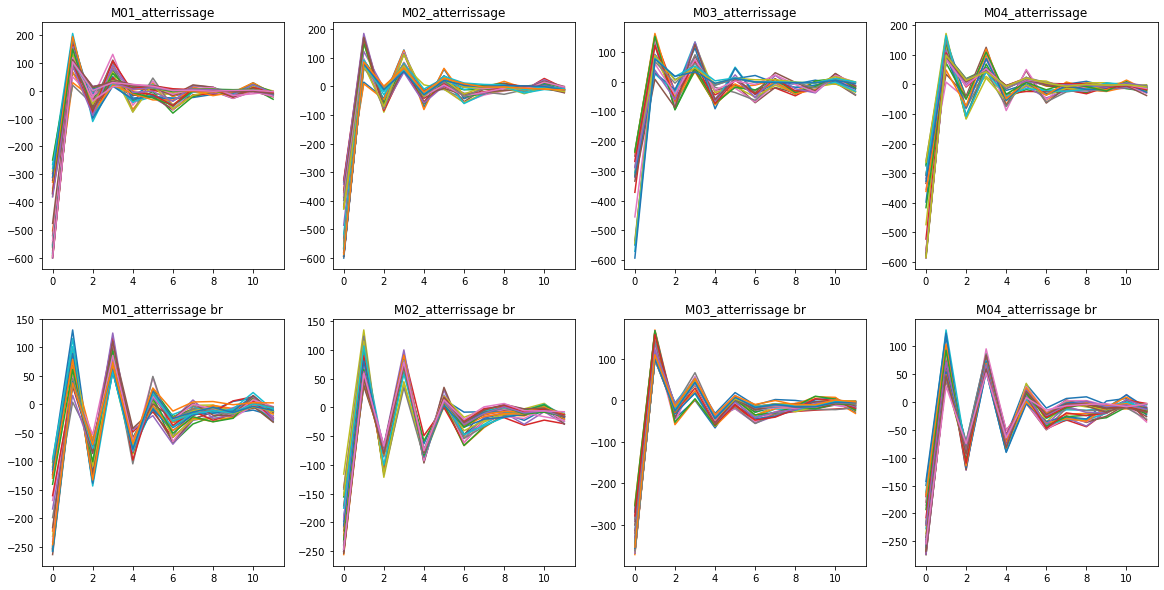

In [48]:
#ici, plot de la commande "atterrissage" pour 4 voix masculines, bruitées et non bruitées

for action in actions[1:2]:
    for i,ID in enumerate(IDs["nonbruite"][:4]):
        y, sr = librosa.load(gen_path("nonbruite", ID, action))
        mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
        n_mfcc=12)
        
        plt.subplot(2,4, (i+1))
        plt.title(f'{ID}_{action}')
        plt.plot(mfcc)
        

for action in actions[1:2]:
    for i,ID in enumerate(IDs["bruite"][:4]):
        y, sr = librosa.load(gen_path("bruite", ID, action))
        
        mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
        n_mfcc=12)
        
        plt.subplot(2,4, 4+i+1)
        plt.title(f'{ID}_{action} br')
        plt.plot(mfcc)

plt.show()

### Comparer les différents coefficients du mfcc

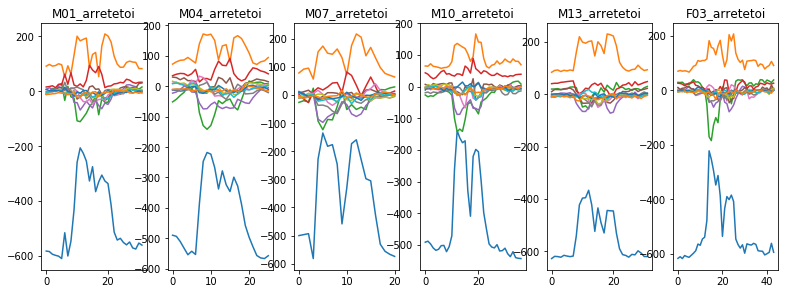

In [49]:
plt.clf()

for action in actions[:1]:
    for i,ID in enumerate(IDs_nonbruite[::3]):
        y, sr = librosa.load(gen_path("nonbruite", ID, action))
        
        mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
        n_mfcc=12)
        
        
        
        plt.subplot(2,len(IDs["nonbruite"])/2, (i+1))
        plt.title(f'{ID}_{action}')
        plt.plot(mfcc.transpose())


plt.show()

### Comparaison d'une MFCC donnée avec toutes les autres dans le but de retrouver la commande donnée initialement

#### Fonction pour la comparaison

In [50]:
def compare_mfcc(filepath):
    y_son, sr_son = librosa.load(filepath)

    mfcc_son_a_decouvrir = librosa.feature.mfcc(y=y_son, sr=sr_son, hop_length=1024, htk=True,
            n_mfcc=12)

    results = []

    max_details_len = 0
    cpt = 0
    for typeSon in IDs:
        if filepath.split("/")[0].split("_")[-1] != list(IDs.keys())[cpt]:
            print(f"{cpt} / {len(IDs) - 1}")
            cpt += 1
            for ID in IDs[typeSon]:
                for action in actions:
                    filename = gen_path(typeSon, ID, action)
                    y, sr = librosa.load(filename)

                    mfcc_test = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
                    n_mfcc=12)

                    action_details = f"{typeSon} {action} ({ID})" 
                    action_details = filename 

                    if len(action_details) > max_details_len:
                        max_details_len = len(action_details)

                    results.append((action_details, round(DTW(1,2,1,mfcc_son_a_decouvrir.transpose(), mfcc_test.transpose(), vect), 3)))


    results.sort(key=lambda k:k[1])

#     for i, (action, result) in enumerate(results):
#         print(f'{i+1}:\t{action:<{max_details_len}}\t|\t{result}')
#     print()

#     print(f'La commande donnée est donc probablement {results[0][0].split()[1]}')
    
    return results


### Test avec corpus de voix donné

In [ ]:
"""
action_to_find = gen_random_path("test")

print(action_to_find, end="\n\n")

compare_mfcc(action_to_find)
"""

#### Fonction de comparaison montrant la commande la plus probable pour chaque voix

In [52]:
def compare_mfcc_voices(filepath, affichage = True):
    
    y_son, sr_son = librosa.load(filepath)

    mfcc_son_a_decouvrir = librosa.feature.mfcc(y=y_son, sr=sr_son, hop_length=1024, htk=True,
            n_mfcc=12)

    results = dict()

    max_details_len = 0 
        
    for typeSon in IDs:
        for ID in IDs[typeSon]:
            dtw_min_score = 10**5
            dtw_min_action = ""

            for action in actions:
                filename = gen_path(typeSon, ID, action)
                
                y, sr = librosa.load(filename)

                mfcc_test = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
                n_mfcc=12)

                action_details = f"{typeSon} {ID}"
                action_display = action_details +" "+ action

                if len(action_display)+1 > max_details_len:
                    max_details_len = len(action_display)

                dtw_score = DTW(1,2,1,mfcc_son_a_decouvrir.transpose(), mfcc_test.transpose(), vect)

                if dtw_score < dtw_min_score:
                    dtw_min_score = dtw_score
                    results[action_details] = (action, dtw_min_score)
    
    if affichage:
        for key in sorted(results.keys(), key=lambda k: results[k][1]):
            action, result = results[key]
            action_dsp = f'{key}: {action}'
            print(f'{action_dsp:<{max_details_len}}\t|\t{result}')
            
    return sorted(results.keys(), key=lambda k: results[k][1])
    
   

### Test avec le corpus de voix perso

In [ ]:
"""
action_to_find = gen_random_path("po")

print(action_to_find, end="\n\n")

compare_mfcc_voices(action_to_find)
"""

#### Chronométrage de la fonction

In [ ]:
"""
import time


action_to_find = gen_random_path("diegob")


print(action_to_find, end="\n\n")

debut=time.time()
results = compare_mfcc_voices(action_to_find, False)
fin= time.time()
print(fin - debut)

print(results)
"""

### Fonction pour comparer un fichier audio à une base de référence

In [54]:
def compare_mfcc_to_reference(path_action_to_find, references, affichage = True):
    """
    On fixe un ensemble de fichier de référence (M01 par exemple) 
    et on donne a notre fonction une action de test (path_action_to_find).
    Cette fonction retourne les différents score de la DTW entre notre 
    action de test et les actions de notre corpus de référence.    
    
    """
    
    reference_typeSon, reference_ID = references
    
    y_son, sr_son = librosa.load(path_action_to_find)
    
    mfcc_son_a_decouvrir = librosa.feature.mfcc(y=y_son, sr=sr_son, hop_length=1024, htk=True,
            n_mfcc=12)

    results = []

    max_details_len = 0 
    dtw_min_score = 10**5
    dtw_min_action = ""
    
    for action in actions:
        filename = gen_path(reference_typeSon, reference_ID, action)
        y, sr = librosa.load(filename)
        mfcc_test = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
                    n_mfcc=12)
        action_details = f"{reference_typeSon} {reference_ID}"
        action_display = action_details +" "+ action
        dtw_score = DTW(1,2,1,mfcc_son_a_decouvrir.transpose(), mfcc_test.transpose(), vect)
        results.append((action, dtw_score))
    
    return sorted(results, key=lambda x : x[-1])



### Avec plusieurs bases de référence

In [55]:
def compare_mfcc_to_references(path_action_to_find, all_references, affichage = True):
    results = []
    
    typeSon = all_references[0]
    for reference in all_references[1:]:
        results.extend(compare_mfcc_to_reference(path_action_to_find, (typeSon,reference), affichage))
    
    return sorted(results, key=lambda x: x[-1])

#### Test

In [58]:
action_to_find = gen_random_path("test")
print(action_to_find, end="\n\n")

z = compare_mfcc_to_references(action_to_find, ["nonbruite"]+IDs_M_nonbruite[:3]) #commande corpus test vs commandes corpus de 3 voix masculines non bruitées 
df = pd.DataFrame(z, columns =['action de réference', 'score']) 
df

corpus_test/M02_plusbas.wav



,action de réference,score
0,plusbas,59.317454
1,plushaut,66.374179
2,plusbas,72.938560
3,decollage,73.284583
4,decollage,73.616576
5,plushaut,74.978346
6,arretetoi,80.054208
7,recule,81.050116
8,recule,83.517121
9,gauche,85.364840


In [61]:
def get_all_actions_from_path(typeSon):
    """
    Retourne tous les fichiers d'un typeSon (['nonbruite', 'bruite', 'test', 'diegonb', 'diegob'])" 
    """
    selected_IDs = IDs[typeSon]
    return [[gen_path(typeSon, selected_IDs[j], actions[i]) for i in range(len(actions))] for j in range(len(selected_IDs))]

In [70]:
# référence M01, test M02

actions_to_find = get_all_actions_from_path("test")[1]
n = len(actions)
for action in actions_to_find:
    print(f"{action.split('/')[-1].split('_')[-1].split('.')[0]} : ")
    z = compare_mfcc_to_reference(action, ["nonbruite", "M01"])
    df = pd.DataFrame(z, columns =['', ''])
    print(df.head(3))
    print()
# a completer

arretetoi : 
                       
0    plusbas  73.114467
1   plushaut  83.623809
2  arretetoi  87.821152

atterrissage : 
                           
0  tournegauche  102.829663
1     decollage  104.637544
2        gauche  107.209318

avance : 
                       
0     avance  94.872873
1     gauche  96.190744
2  arretetoi  97.988948

decollage : 
                      
0   plusbas  81.185980
1  plushaut  86.716476
2    gauche  88.656855

droite : 
                       
0     gauche  87.118808
1    plusbas  88.010718
2  arretetoi  90.906415

etatdurgence : 
                          
0  etatdurgence  87.476269
1       plusbas  90.638514
2    faisunflip  90.910991

faisunflip : 
                        
0    plusbas   99.600273
1  arretetoi  107.654900
2  decollage  107.951353

gauche : 
                          
0        gauche  81.292012
1  tournegauche  90.494409
2       plusbas  99.117401

plusbas : 
                       
0    plusbas  59.317454
1   plushaut  66.374179

In [64]:
def all_actions_from_path_withID(typeSon, ID):
    return [gen_path(typeSon, ID, action) for action in actions]

In [71]:
references_actions = (get_all_actions_from_path("reference"))[0] # dans le cas du corpus référence vu qu'il n'y a qu'un ID (M01 pour l'instant pas besoin de flatten la liste, il suffit de récupérer le premier élément)
for action_de_ref in references_actions:
    print(action_de_ref)
print("\n"*2)
print("--"*20)
print("\n"*2)
flatten = lambda l: [e for m in l for e in m]
references_nonbruite = flatten(get_all_actions_from_path("nonbruite"))
for action_de_nb in references_nonbruite:
    print(action_de_nb)

testdiegonb_actions = get_all_actions_from_path("diegonb")[0]


corpus_reference/M01_arretetoi.wav
corpus_reference/M01_atterrissage.wav
corpus_reference/M01_avance.wav
corpus_reference/M01_decollage.wav
corpus_reference/M01_droite.wav
corpus_reference/M01_etatdurgence.wav
corpus_reference/M01_faisunflip.wav
corpus_reference/M01_gauche.wav
corpus_reference/M01_plusbas.wav
corpus_reference/M01_plushaut.wav
corpus_reference/M01_recule.wav
corpus_reference/M01_tournedroite.wav
corpus_reference/M01_tournegauche.wav



----------------------------------------



corpus/dronevolant_nonbruite/M01_arretetoi.wav
corpus/dronevolant_nonbruite/M01_atterrissage.wav
corpus/dronevolant_nonbruite/M01_avance.wav
corpus/dronevolant_nonbruite/M01_decollage.wav
corpus/dronevolant_nonbruite/M01_droite.wav
corpus/dronevolant_nonbruite/M01_etatdurgence.wav
corpus/dronevolant_nonbruite/M01_faisunflip.wav
corpus/dronevolant_nonbruite/M01_gauche.wav
corpus/dronevolant_nonbruite/M01_plusbas.wav
corpus/dronevolant_nonbruite/M01_plushaut.wav
corpus/dronevolant_nonbruite/M01_re

In [164]:
def buildConfusionMatrix(references, test, affichage = False):
    corpus_reference = references[0]
    IDs_reference = references[1:] if len(references) > 1 else IDs[corpus_reference]
#     print(reference, test)
    corpus_test = test[0]
    IDs_test = test[1:] if len(test) > 1 else IDs[corpus_test]
    
    cptbonnesrep = 0
    predictions = [] 
    vraisresultats = actions*len(IDs_reference)*len(IDs_test)
#     corpusdetest = get_all_actions_from_path(corpus_test)[int(IDs_test[1:]) - 1]
    corpusdetest = []
    for id_test in IDs_test:
        corpusdetest.extend(all_actions_from_path_withID(corpus_test, id_test))
        
#     print("debut de la construction de la matrice de confusion ... \n |",end =" ")
    n = len(corpusdetest)

    for c, reference in enumerate(IDs_reference):
        for i in range(n):
            action_a_tester = corpusdetest[i]
    #         print(f"{i} / {n}", end=" | ")

            z = compare_mfcc_to_reference(action_a_tester, [corpus_reference, reference])[0]
            
            predictions.append(z[0])
            if z[0] == actions[i%len(actions)]:
                cptbonnesrep+=1
        
        print(f"{c+1}/{len(IDs_reference)} done")
    #     print("fin de la construction.")
    

#     print(f"Sur {len(actions)} actions testés, on a obtenu {cptbonnesrep} bonnes réponses. \n SCORE = {round(cptbonnesrep / len(actions),2)}%")
    return confusion_matrix(vraisresultats, predictions), cptbonnesrep

def drawConfusionMatrix(confusion_matrix, infos, score, nb_corpus_reference = 1, nb_corpus_test = 1):
    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in actions],
                      columns = [i for i in actions])
    
    plt.figure(figsize=(7,7))
    
    ax = sn.heatmap(df_cm, annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    ax.set_title(f"Comparaison entre {infos[0]} et {infos[1]} ")
    print(f"score : {round(score / (13 * nb_corpus_reference * nb_corpus_test) * 100, 2)}%")

# Matrices de confusion

## Avec la voix de test

#### -Avec les voix masculines non bruitées

In [73]:
cfsm_1, score_1 = buildConfusionMatrix(["nonbruite"]+IDs_M_nonbruite, ["test","M01"])

1/13 done
2/13 done
3/13 done
4/13 done
5/13 done
6/13 done
7/13 done
8/13 done
9/13 done
10/13 done
11/13 done
12/13 done
13/13 done


score : 39.05%


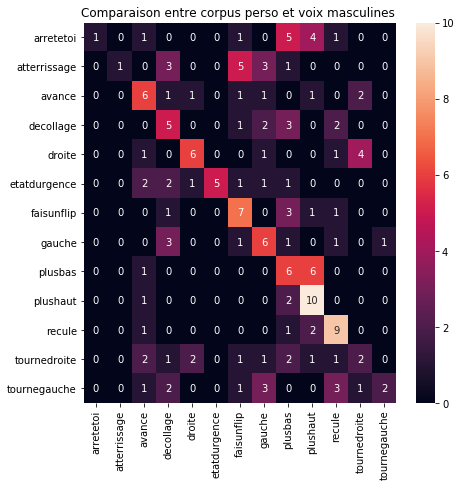

In [84]:
drawConfusionMatrix(cfsm_1, ["corpus perso", "voix masculines"], score_1, len(IDs_M_nonbruite))

#### -Avec les voix féminines non bruitées

In [75]:
cfsm_f_1, score_f_1 = buildConfusionMatrix(["nonbruite"]+IDs_F_nonbruite, ["test","M01"])

1/5 done
2/5 done
3/5 done
4/5 done
5/5 done


score : 21.54%


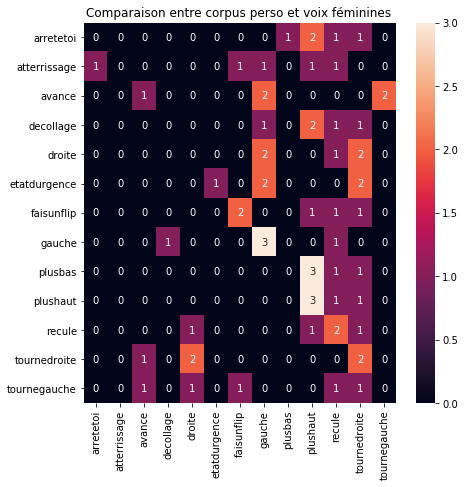

In [85]:
drawConfusionMatrix(cfsm_f_1, ["corpus perso", "voix féminines"], score_f_1, len(IDs_F_nonbruite))

#### -Avec les voix bruitées

In [79]:
cfsm_b_1, score_b_1 = buildConfusionMatrix(["bruite"]+IDs["bruite"], ["test","M01"])

1/4 done
2/4 done
3/4 done
4/4 done


score : 9.62%


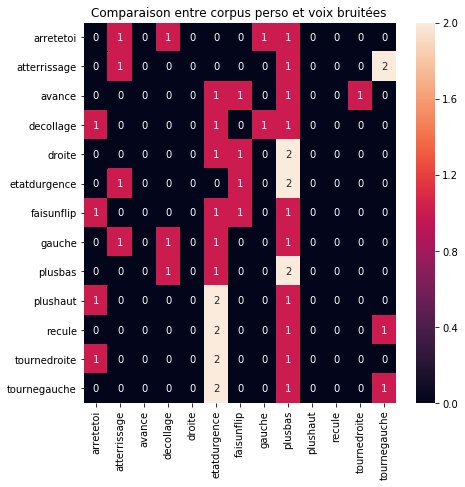

In [86]:
drawConfusionMatrix(cfsm_b_1, ["corpus perso", "voix bruitées"], score_b_1, len(IDs["bruite"]))

## Avec les 3 voix de test

#### -Avec les voix masculines non bruitées

In [94]:
cfsm, score = buildConfusionMatrix(["nonbruite"]+IDs_M_nonbruite, ["test"])

1/13 done
2/13 done
3/13 done
4/13 done
5/13 done
6/13 done
7/13 done
8/13 done
9/13 done
10/13 done
11/13 done
12/13 done
13/13 done


score : 30.37%


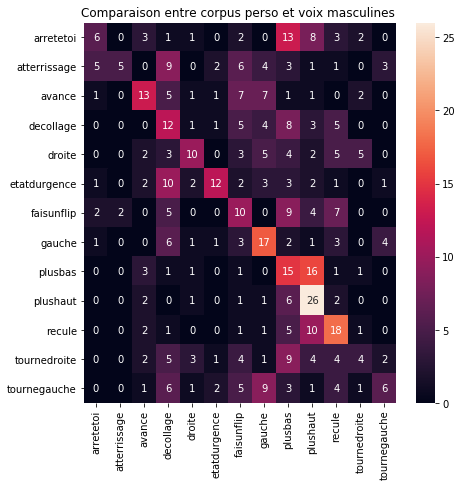

In [95]:
drawConfusionMatrix(cfsm, ["corpus perso", "voix masculines"], score, len(IDs_M_nonbruite), len(IDs["test"]))

#### -Avec les voix féminines non bruitées

In [96]:
cfsm_f, score_f = buildConfusionMatrix(["nonbruite"]+IDs_F_nonbruite, ["test"])

1/5 done
2/5 done
3/5 done
4/5 done
5/5 done


score : 17.95%


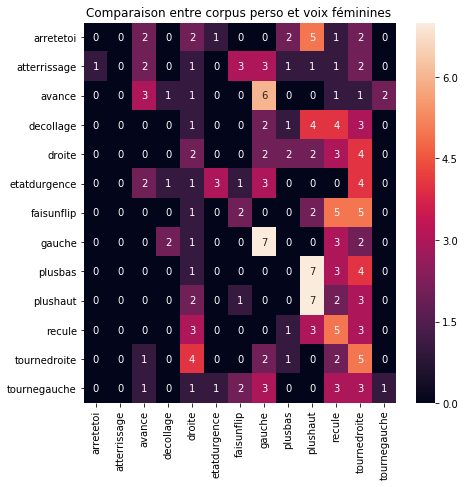

In [97]:
drawConfusionMatrix(cfsm_f, ["corpus perso", "voix féminines"], score_f, len(IDs_F_nonbruite), len(IDs["test"]))

#### -Avec les voix bruitées

In [98]:
cfsm_b, score_b = buildConfusionMatrix(["bruite"]+IDs["bruite"], ["test"])

1/4 done
2/4 done
3/4 done
4/4 done


score : 7.05%


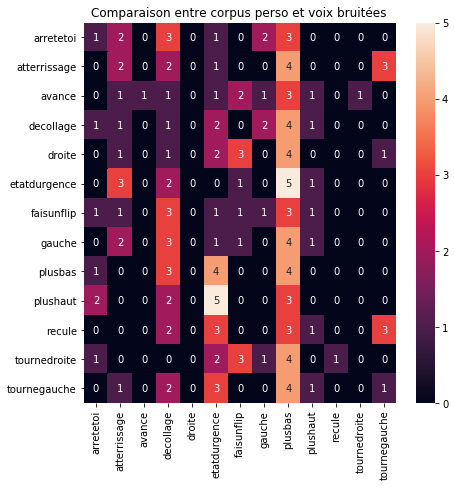

In [99]:
drawConfusionMatrix(cfsm_b, ["corpus perso", "voix bruitées"], score_b, len(IDs["bruite"]), len(IDs["test"]))

Partie III, ACP

Réduction de dimension par $ACP$

In [265]:
def moyenneMfccs(corpusReference):
    """
    Cette fonction créer la matrice qui contient pour la colonne i, un vecteur de dimension 12 qui correspond à la moyenne colonne par colonne de la mfcc associée
    Input : Liste des 13 actions (.wav), ce corpus représente notre base de référence (définie arbitrairement)
    Output : Matrice numpy (12,13)
    """
    L = []
    for e in corpusReference:
        m1, sr_m1 = librosa.load(e)
        mfcc_m1 = librosa.feature.mfcc(y=m1, sr=sr_m1, hop_length=1024, htk=True,
        n_mfcc=12)
        L.append(np.mean(mfcc_m1.transpose(), axis = 0))
    return np.asarray(L)
 
    
testCorpus = flatten(get_all_actions_from_path("test"))

# on récupère la matrice qui pour la ligne i, contient le vecteur de dimension 12 qui est la moyenne colonne par colonne de l'action i.
I = moyenneMfccs(testCorpus).transpose()
scaler = StandardScaler()
scaler.fit(I)
I_center = scaler.transform(I) # on centre les données
pca = PCA(n_components=3)
P = pca.fit_transform(I_center).transpose() # réduction en dimension 3
print(P.shape)

(3, 12)


In [266]:
def build_set_for_supervisedlearning(typeSon):
    trainingSet = []
    
    for ID in IDs[typeSon]:
        temp = moyenneMfccs(all_actions_from_path_withID(typeSon, ID)).transpose()
        trainingSet.extend((P @ temp).transpose())
    
    return np.array(trainingSet)

def build_training_set_answers(typeSon):
        
        #Construction des réponses (apprentissage supervisé)
        supervised = []
        for ID in IDs[typeSon]:
            supervised.extend(all_actions_from_path_withID(typeSon, ID))
        return supervised

In [270]:
# remarque : si on utilise nonbruité pour l'apprentissage et référence (qui est un sous ensemble de nonbruité) 
# pour le test, bonne nouvelle on obtient 13 / 13. Par contre si on prend autre chose pour le test les résultats
# sont (assez) mauvais.
def kppv(training_set, supervised_answers, prediction_set, nb_neighbors=1):
    neigh = KNeighborsClassifier(n_neighbors=nb_neighbors)
    neigh.fit(training_set, supervised_answers) 
    L, R = [], []
    res = neigh.predict(prediction_set)
    #print(res, len(res))
    cpt = 0
    for pred_i, res_i in list(zip(res, actions)):
        left, right = pred_i.split('_')[-1].split('.')[0], res_i 
        L.append(left)
        R.append(right)
        if left == right:
            cpt+=1
    return list(zip(R, L)), cpt

In [268]:
training_set, supervised_answers = build_set_for_supervisedlearning("nonbruite"), build_training_set_answers("nonbruite")
prediction_set = build_set_for_supervisedlearning("test")
print(training_set.shape, " == ", len(supervised_answers))

(234, 3)  ==  234


In [271]:
D, cpt = kppv(training_set, supervised_answers, prediction_set)
print(f"score final : {round(cpt/13*100, 2)}%")
df = pd.DataFrame(D, columns=["Actions", "Prédictions"])
df.style.apply(lambda x: ["background: yellow" if x.iloc[1] == x.iloc[0] else "" for v in x], axis = 1)

score final : 15.38%


,Actions,Prédictions
0,arretetoi,decollage
1,atterrissage,tournegauche
2,avance,tournedroite
3,decollage,recule
4,droite,etatdurgence
5,etatdurgence,decollage
6,faisunflip,recule
7,gauche,gauche
8,plusbas,tournegauche
9,plushaut,tournedroite


In [250]:
colors = ["black","slategrey","blue","lightblue","cyan","Green","lightgreen","yellow","brown","orange","red","purple","pink"]

def plot_training_data3D(training_set, offset=50):
    n = len(actions)
    
    min_x, min_y, min_z = min(training_set[:, 0]), min(training_set[:, 1]), min(training_set[:, 2]) 
    max_x, max_y, max_z = max(training_set[:, 0]), max(training_set[:, 1]), max(training_set[:, 2])
    
    data_to_plot = [training_set[i::n] for i in range(n)]

    fig = plt.figure()
    nlines, nrows = 7, 2

    fig = plt.figure(figsize=(20,50))

    for i in range(n):
        j = fig.add_subplot(nlines, nrows,i + 1, projection="3d")
        j.set_xlabel('X Label')
        j.set_ylabel('Y Label')
        j.set_zlabel('Z Label')

        x, y, z = data_to_plot[i][:,0], data_to_plot[i][:,1], data_to_plot[i][:,2]
        
        j.set_xlim([min_x-offset, max_x+offset])
        j.set_ylim([min_y-offset, max_y+offset])
        j.set_zlim([min_z-offset, max_z+offset])

        j.scatter(x, y, z, c=colors[i], label=actions[i], s = 100, edgecolors='black')
        j.set_title("Données d'apprentissage pour : " + actions[i])
        j.legend(loc='center left', prop={'size': 15})
    plt.show()

<Figure size 432x288 with 0 Axes>

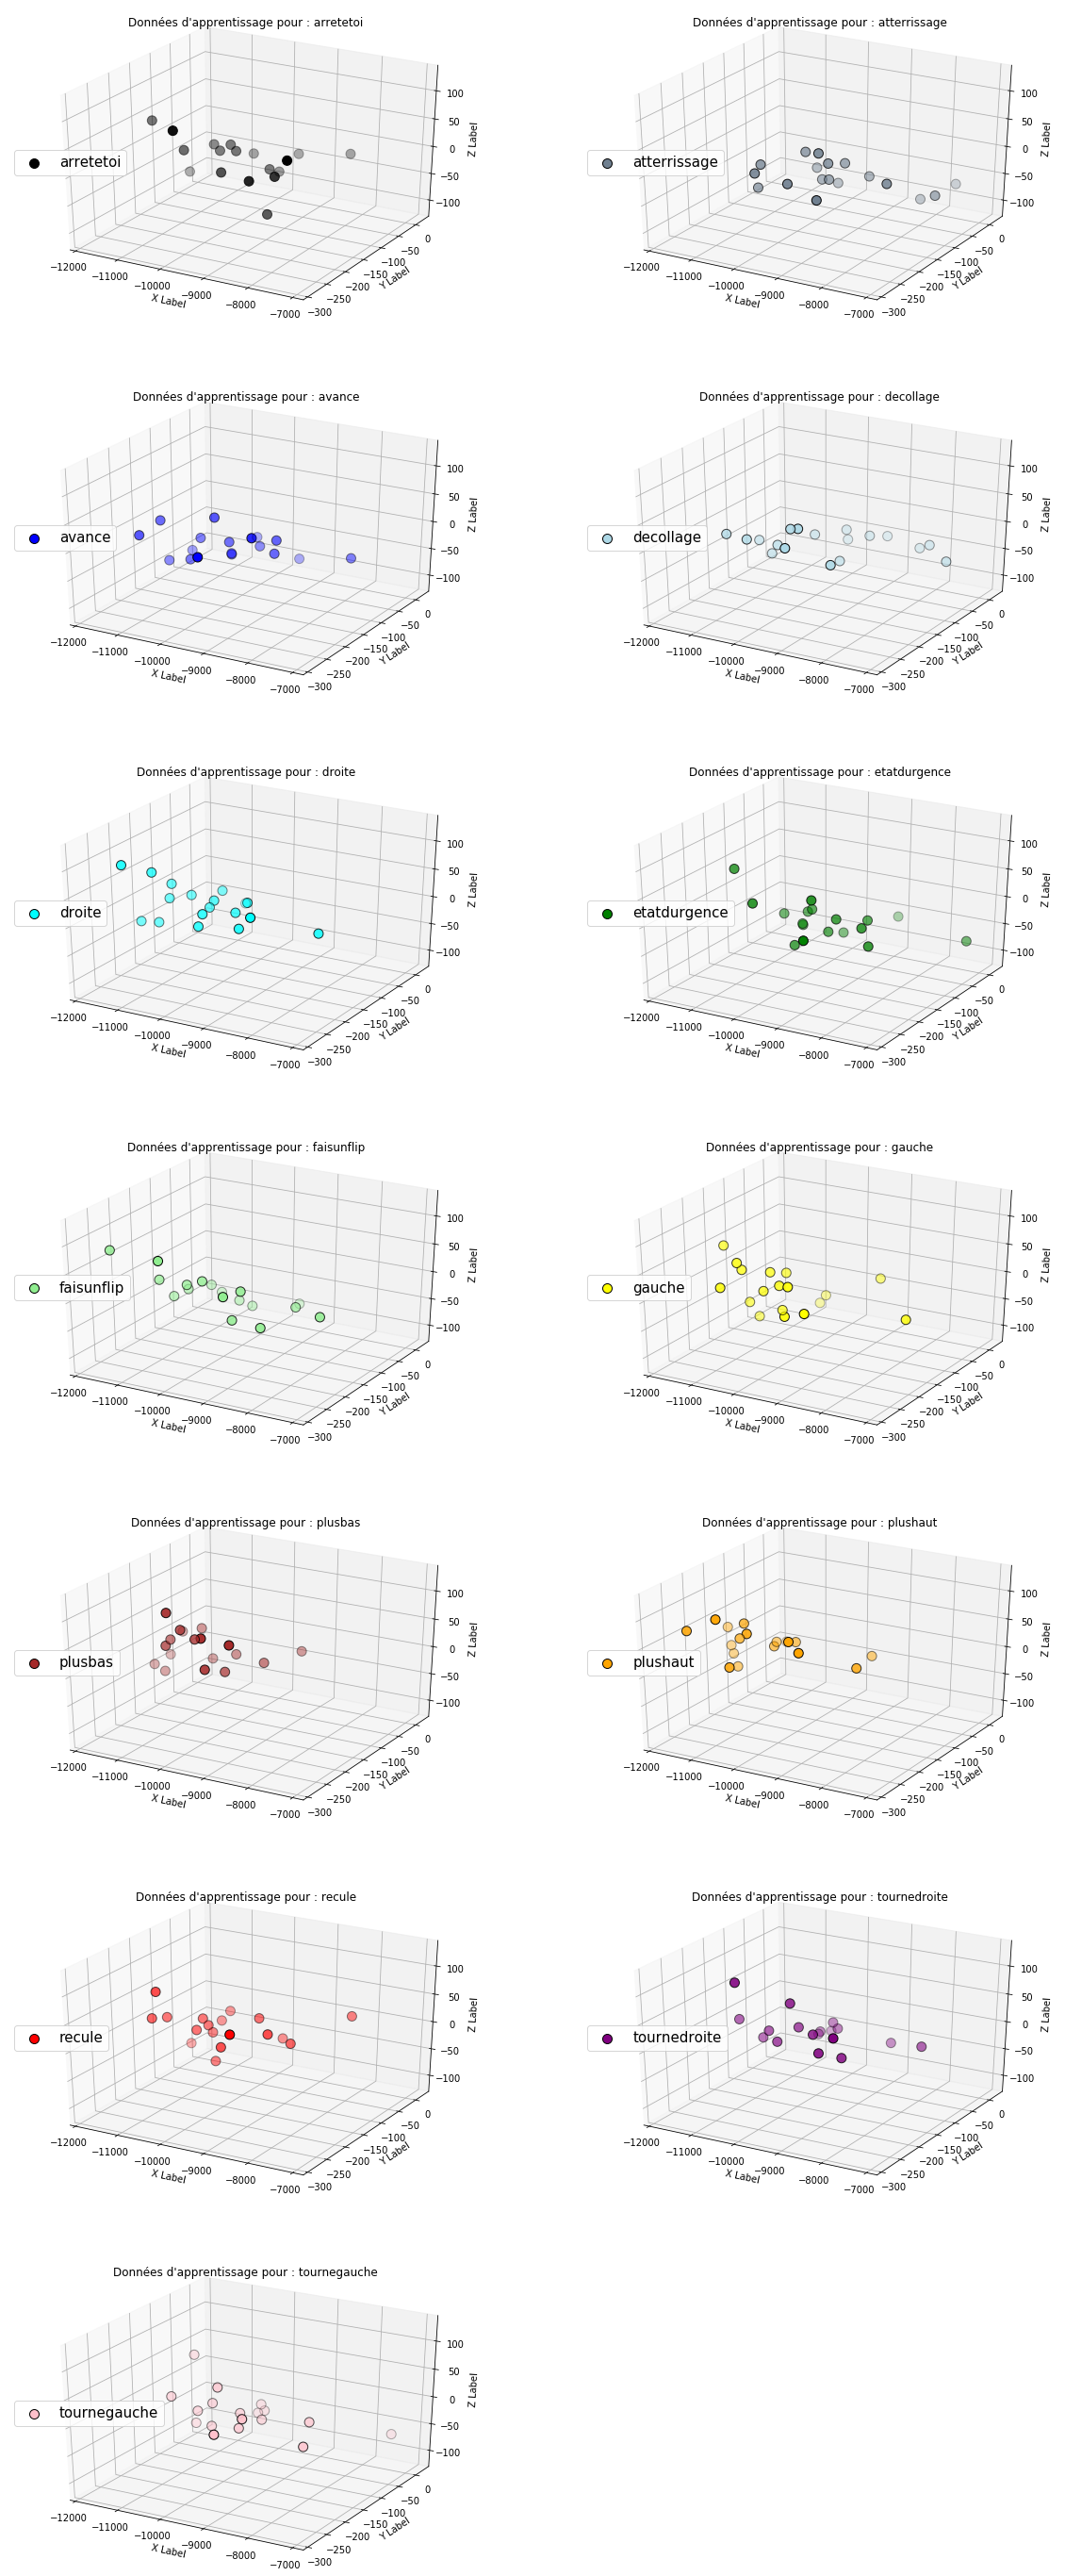

In [256]:
plot_training_data3D(training_set)

In [263]:
def plot_training_and_prediction_data3D(training_set, prediction_set, size_dots_training_set, size_dots_prediction_set):
    
    n = len(actions)
    data_to_plot = [training_set[i::n] for i in range(n)]
    
    fig = plt.figure(constrained_layout=True)
    gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    fig = plt.figure(figsize=(20,40))
    
    #### Plot training data + prediction data ####
    
    ax = fig.add_subplot(gs[0, :], projection="3d")
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    for i in range(n):
        x, y, z = data_to_plot[i][:,0], data_to_plot[i][:,1], data_to_plot[i][:,2]
        ax.scatter(x,y,z, c=colors[i], s=size_dots_training_set, alpha=0.20, edgecolors="black")

    xpredict, ypredict, zpredict = prediction_set[:,0], prediction_set[:,1], prediction_set[:,2]
    for i in range(n):
        ax.scatter(xpredict[i], ypredict[i], zpredict[i], c=colors[i], label=actions[i], s=size_dots_prediction_set, edgecolors="black")

    ax.legend(loc='center left', prop={'size': 15})    
    ax.set_title("Données d'apprentissage ET données de tests")

    
    
    
    
    #### Plot training data ####

    fig = plt.figure(figsize=(20,20))
    ax2 = fig.add_subplot(gs[1,0], projection="3d")
    ax2.set_xlabel('X Label')
    ax2.set_ylabel('Y Label')
    ax2.set_zlabel('Z Label')
    ax2.set_title("Données d'apprentissage")


    for i in range(n):
        x, y, z = data_to_plot[i][:,0], data_to_plot[i][:,1], data_to_plot[i][:,2]
        ax2.scatter(x,y,z, c=colors[i], label=actions[i], s=size_dots_training_set, alpha=0.20, edgecolors="black")
        ax2.legend(loc='center left', prop={'size': 15})


    
    
    #### prediction data ####

    ax3 = fig.add_subplot(gs[1,1], projection="3d")
    ax3.set_xlabel('X Label')
    ax3.set_ylabel('Y Label')
    ax3.set_zlabel('Z Label')
    ax3.set_title("Données de tests")

    for i in range(13):
        ax3.scatter(xpredict[i], ypredict[i], zpredict[i], c=colors[i], label=actions[i], s=size_dots_prediction_set, edgecolors="black")

    ax3.legend(loc='center left', prop={'size': 15})    

    plt.show()

<Figure size 432x288 with 0 Axes>

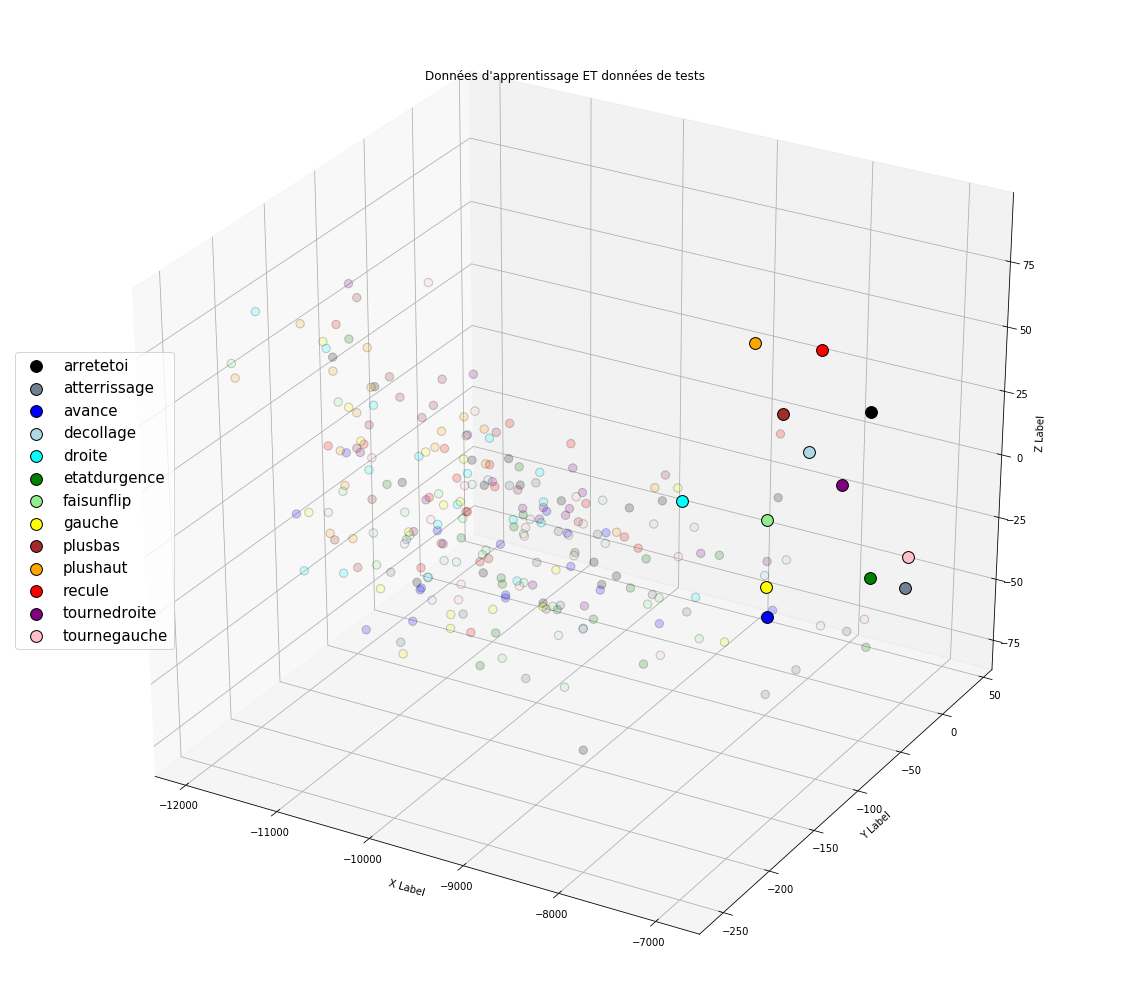

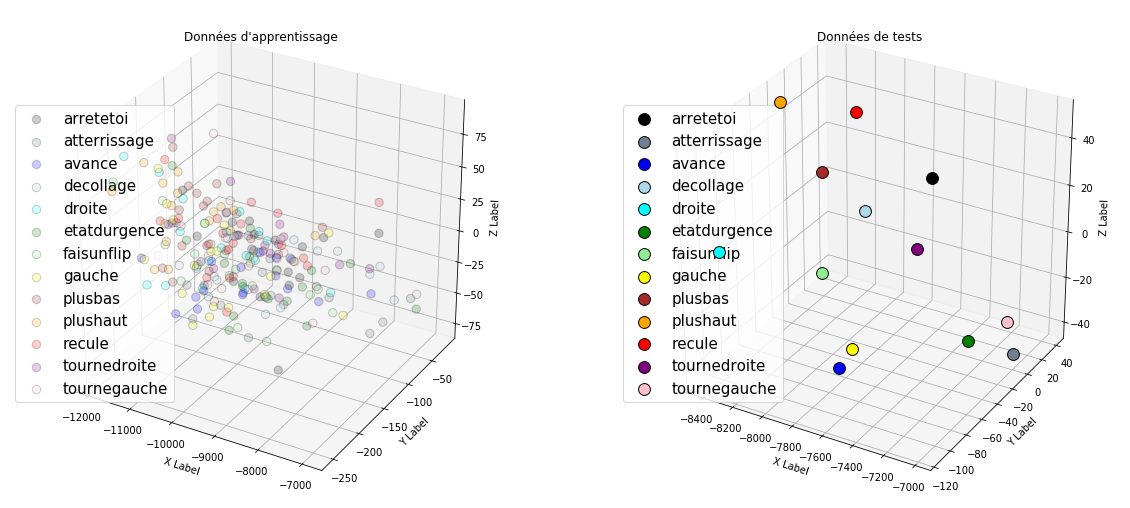

In [264]:
plot_training_and_prediction_data3D(training_set, prediction_set, 70, 140)

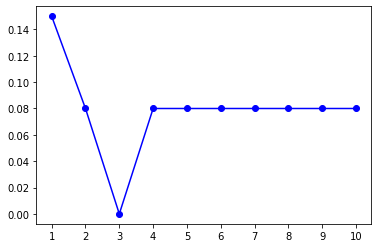

In [285]:
def compare_different_k(n, training_set, supervised_answers, prediction_set):
    x_values = list(range(1, n+1))
    y_values = [round(kppv(training_set, supervised_answers, prediction_set, i)[1]/13, 2) for i in range(1, n+1)]
    
    plt.plot(x_values, y_values, 'b-o')
    
    plt.xticks(x_values)
    
    plt.show()
    
compare_different_k(10, training_set, supervised_answers, prediction_set)    

In [ ]:
# diego : étude homme femme + comparaison KPPV 
# benji : étude voix benji + manip des données

# Sujet d'étude :  Comparaison voix perso

- Comparaison voix avec voix masculines
- Comparaison voix avec voix féminines
- Comparaison voix avec voix bruitées

Sujet d'étude : Comparaison voix homme / femme 
======

Dans cette étude nous comparerons :
     1. Un corpus de test de 13 actions dictées par une voix masculine AVEC un corpus de référence
         1.1 homme vs non bruité 
             - faire des exemples PUIS calcul général (corpus test vs tous les corpus non bruités)  
         1.2 homme vs bruite
             - faire des exemples PUIS calcul général (corpus test vs tous les corpus non bruités)  
     2. Un corpus de test de 13 actions dictées par une voix feminine AVEC un corpus de référence
         - pareil que au dessus
     
 Le corpus de référence contient des voix féminines, des voix masculines, des voix bruités et non bruités.

Dans cette étude nous comparerons :
     1. Un corpus de test de 13 actions dictées par une voix masculine AVEC
         - le corpus de base non bruité
         - le corpus de base bruité
         - le corpus perso non bruité
         - le corpus perso bruité
     2. faire pareil pour les femmes
         
 Le corpus de référence contient des voix féminines, des voix masculines, des voix bruités et non bruités.

Chargement des corpus masculin et féminin

In [ ]:
actions = ["arretetoi","atterrissage","avance","decollage","droite","etatdurgence","faisunflip","gauche","plusbas","plushaut","recule","tournedroite","tournegauche"]
actions_male = get_all_actions_from_path("po")[0] 
# female = get_all_actions_from_path("na")[0]
print(actions_male)

1-) DTW
====

Etude **voix masculine** 
----

Prenons au hasard 4 items de ce corpus (2 items homme et 2 items femme) et traçons leur matrices de confusion 

In [ ]:
homme_items = [x for x in IDs["nonbruite"] if x[0] == "M" ]
femme_items  = [x for x in IDs["nonbruite"] if x[0] == "F" ]
rng_items_id = random.sample(range(0, len(homme_items)), 2) + random.sample(range(len(homme_items), len(homme_items) + len(femme_items)), 2)
rng_items = list(map(lambda x : IDs["nonbruite"][x] , rng_items_id))
print(rng_items)


On dessine les 4 matrices de confusions

In [ ]:
for item in rng_items:
    cfsm, cpt = buildConfusionMatrix(["nonbruite", item], ["po", "M01"]) # corpus de réference : "nonbruit", corpus de test : "test"
    drawConfusionMatrix(cfsm, [f"nonbruite({item})", "po(M01)"], cpt)

Comparaison corpus de test avec items homme non bruité

In [ ]:
def comparaison(CorpusTest, typeCorpusRef, items,):
    typeCorpusTest, acteurCorpusTest = CorpusTest
    scores = []
    for item in items:
        _, s = buildConfusionMatrix([typeCorpusRef, item], [typeCorpusTest, acteurCorpusTest])
        scores.append(s)
    score_moyen = int(sum(list(map(lambda x : int(x / 13 * 100), scores))) / len(scores)) + 1
    print(f"Avec notre corpus de test {typeCorpusTest}, en le comparant avec {typeCorpusRef} on obtient un score moyen de {score_moyen} %")
    return scores


In [ ]:
homme_items = [x for x in IDs["nonbruite"] if x[0] == "M" ]
femme_items  = [x for x in IDs["nonbruite"] if x[0] == "F" ]

scores = comparaison(["po", "M01"], "nonbruite", homme_items)
scores = comparaison(["po", "M01"], "nonbruite", femme_items)
scores = comparaison(["po", "M01"], "bruite", IDs["bruite"])
scores = comparaison(["po", "M01"], "diegob", IDs["diegob"])
scores = comparaison(["po", "M01"], "diegonb", IDs["diegonb"])

Etude **voix feminine** 
----

In [ ]:
for item in rng_items:
    cfsm, cpt = buildConfusionMatrix(["nonbruite", item], ["feminin", "F01"]) # corpus de réference : "nonbruit", corpus de test : "test"
    drawConfusionMatrix(cfsm, [f"nonbruite({item})", "feminin(M01)"], cpt)

In [ ]:
scores = comparaison(["feminin", "F01"], "nonbruite", homme_items)
scores = comparaison(["feminin", "F01"], "nonbruite", femme_items)
scores = comparaison(["feminin", "F01"], "bruite", IDs["bruite"])
scores = comparaison(["feminin", "F01"], "diegob", IDs["diegob"])
scores = comparaison(["feminin", "F01"], "diegonb", IDs["diegonb"])